In [1]:
from pydub import AudioSegment
from pydub.playback import play
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display

In [2]:
import os
os.chdir('..')

In [137]:
seg = AudioSegment.from_file("music/edm/Agatha.mp3")

FileNotFoundError: [Errno 2] No such file or directory: 'music/edm/Agatha.mp3'

In [84]:
seg = seg.set_channels(1)

In [85]:
seg.export("test.wav", format="wav")

<_io.BufferedRandom name='test.wav'>

In [86]:
fs, frames = wavfile.read('test.wav')

/Users/edwardli/anaconda3/envs/song-classifier/lib/python3.7/site-packages/matplotlib/axes/_axes.py:7739: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


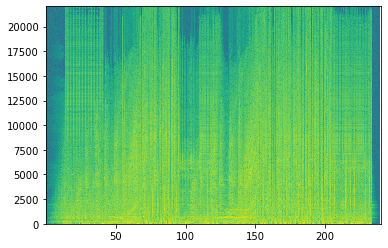

In [87]:
fig, (ax2) = plt.subplots(nrows=1)
data, freqs, bins, im = ax2.specgram(np.array(frames), NFFT=8192, Fs=fs, noverlap=int(8192 * 0.75))

In [3]:
y, sr = librosa.load("music/edm/Agatha.mp3")

/Users/edwardli/anaconda3/envs/song-classifier/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


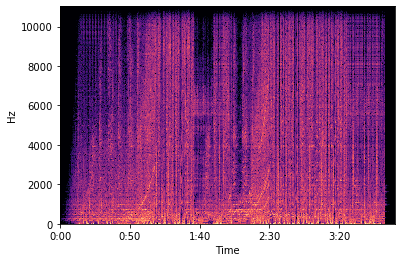

In [9]:
hop_length = 512
n_fft = 4096
D = np.abs(librosa.stft(y, n_fft=n_fft,  
                        hop_length=hop_length))
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='linear');
#plt.colorbar();

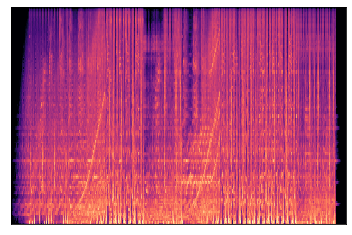

In [10]:
n_mels = 128
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, 
                                   hop_length=hop_length, 
                                   n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length)

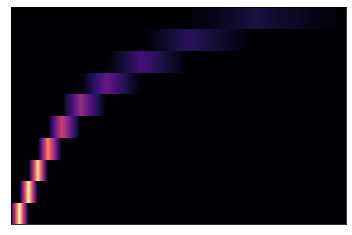

In [21]:
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel, sr=sr, hop_length=hop_length)

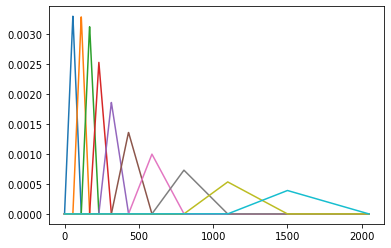

In [22]:
for i in mel:
    plt.plot(i)

In [39]:
import matplotlib.image as mpimg

In [40]:
img = mpimg.imread("test.png")

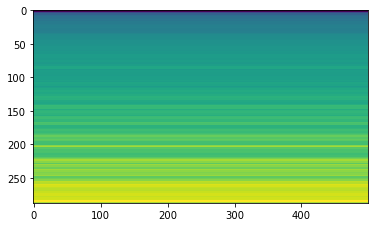

In [41]:
plt.imshow(np.repeat(np.expand_dims(np.average(img[:,:,0], axis=1), axis=1), 500, axis=1))

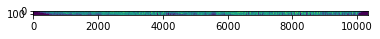

In [118]:
plt.imshow(S_DB)

In [120]:
from PIL import Image

In [128]:
im = Image.fromarray(S_DB)
im = im.convert('RGB')

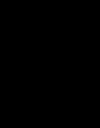

In [127]:
im.resize((100, 128))